In [1]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.5     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
### demuxlet, freexmuelt

demux_order <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                 'scsplit', 'scsplit_nogenos',
                 'souporcell','souporcell_nogenos',
                  'demuxalot', 'scavengers')

gex_order <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                 'scsplit', 'scsplit_nogenos',
                 'souporcell','souporcell_nogenos',
                  'demuxalot')

atac_order <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                 'scsplit', 'scsplit_nogenos',
                 'souporcell','souporcell_nogenos',
                  'scavengers')

In [4]:
gex_pd = read.table(paste0(projdir, 'csv/final_figures/figure3/gex_pd_ambient.csv.gz'), sep='\t', header=1)
atac_pd = read.table(paste0(projdir, 'csv/final_figures/figure3/atac_pd_ambient.csv.gz'), sep='\t', header=1)
gex_mux = read.table(paste0(projdir, 'csv/final_figures/figure3/gex_mux_ambient.csv.gz'), sep='\t', header=1)
atac_mux = read.table(paste0(projdir, 'csv/final_figures/figure3/atac_mux_ambient.csv.gz'), sep='\t', header=1)

In [5]:
### ratchet!!!
gex_pd <- gex_pd %>% mutate(droplet_acc = str_replace(droplet_acc, "Correctly called droplet", "Accurate"))
gex_pd <- gex_pd %>% mutate(droplet_acc = str_replace(droplet_acc, "Incorrectly called droplet", "Inaccurate"))
atac_pd <- atac_pd %>% mutate(droplet_acc = str_replace(droplet_acc, "Correctly called droplet", "Accurate"))
atac_pd <- atac_pd %>% mutate(droplet_acc = str_replace(droplet_acc, "Incorrectly called droplet", "Inaccurate"))
gex_mux <- gex_mux %>% mutate(droplet_acc = str_replace(droplet_acc, "Correctly called droplet", "Accurate"))
gex_mux <- gex_mux %>% mutate(droplet_acc = str_replace(droplet_acc, "Incorrectly called droplet", "Inaccurate"))
atac_mux <- atac_mux %>% mutate(droplet_acc = str_replace(droplet_acc, "Correctly called droplet", "Accurate"))
atac_mux <- atac_mux %>% mutate(droplet_acc = str_replace(droplet_acc, "Incorrectly called droplet", "Inaccurate"))

In [6]:
gex_pd$method <- factor(gex_pd$method, levels = demux_order)
atac_pd$method <- factor(atac_pd$method, levels = demux_order)
gex_mux$method <- factor(gex_mux$method, levels = demux_order)
atac_mux$method <- factor(atac_mux$method, levels = demux_order)

In [7]:
geno_free <- c('freemuxlet', 'vireo_nogenos', 'souporcell_nogenos',
               'scsplit_nogenos', 'scavengers')
gex_pd$geno_type <- rep('Genotype based', dim(gex_pd)[1])
mask <- gex_pd$variable %in% geno_free
gex_pd[mask,'geno_type'] <- rep('Genotype free', sum(mask))

atac_pd$geno_type <- rep('Genotype based', dim(atac_pd)[1])
mask <- atac_pd$variable %in% geno_free
atac_pd[mask,'geno_type'] <- rep('Genotype free', sum(mask))

gex_mux$geno_type <- rep('Genotype based', dim(gex_mux)[1])
mask <- gex_mux$variable %in% geno_free
gex_mux[mask,'geno_type'] <- rep('Genotype free', sum(mask))

atac_mux$geno_type <- rep('Genotype based', dim(atac_mux)[1])
mask <- atac_mux$variable %in% geno_free
atac_mux[mask,'geno_type'] <- rep('Genotype free', sum(mask))

In [8]:
palette = 'Oranges'

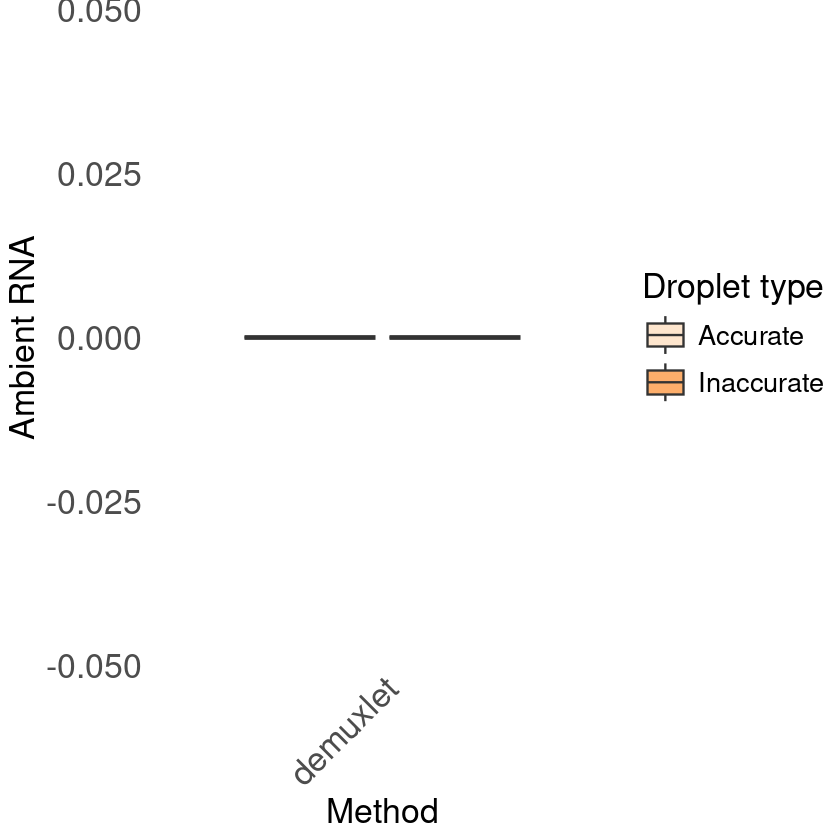

In [9]:
tmp_gex_pd = gex_pd[1:1000,]
axis_size = 20
p1_with_legend <- ggplot(tmp_gex_pd, aes(x = method, y = ambient_RNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank(),
        legend.title = element_text(size = 20)) +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
    scale_fill_brewer(palette=palette) + 
  labs(x = "Method", y = "Ambient RNA", fill = "Droplet Accuracy")
p1_with_legend

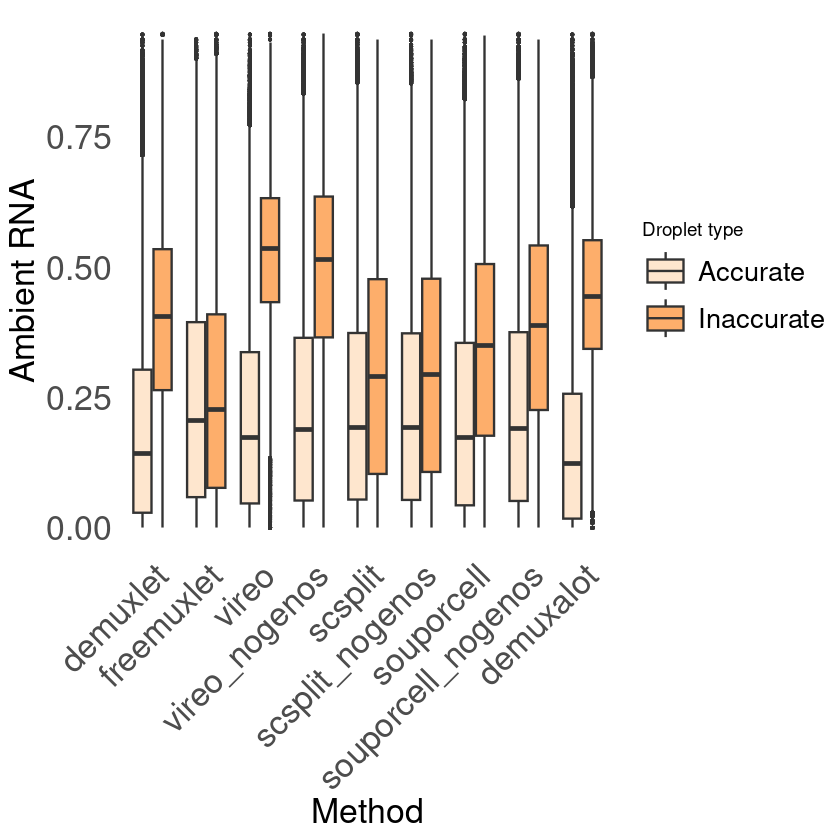

In [10]:
axis_size = 20
p1_with_legend <- ggplot(gex_pd, aes(x = method, y = ambient_RNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank()) +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
    scale_fill_brewer(palette=palette) + 
  labs(x = "Method", y = "Ambient RNA", fill = "Droplet Accuracy")
p1_with_legend

In [11]:
# axis_size = 20
# p1_with_legend <- ggplot(gex_pd, aes(x = method, y = ambient_DNA, fill = droplet_acc)) +
#   geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
#    theme_minimal() + 
#    theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
#         axis.text.y = element_text(size=axis_size,angle=0),
#         axis.title.x = element_text(size=axis_size),
#         axis.title.y = element_text(size=axis_size),
#          legend.key.size = unit(1, "cm"), 
#          legend.text = element_text(size = 16),
#          panel.grid = element_blank(),
#         legend.title = element_text('Droplet type')) +
#   guides(fill = guide_legend(title = NULL, override.aes = list(size = 1))) + 
#   labs(x = "Method", y = "# SNPs covered", fill = "Droplet Accuracy") +
#     scale_fill_brewer(palette=palette)
# p1_with_legend

In [12]:
axis_size = 12
p1 <- ggplot(gex_pd, aes(x = method, y = ambient_RNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank(),
        legend.position = 'none') +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
  labs(x = "", y = "Ambient RNA", fill = "Droplet Accuracy") +
    ggtitle('RNA, vary doublet rate') +
    scale_fill_brewer(palette=palette)

In [13]:
p2 <- ggplot(atac_pd, aes(x = method, y = ambient_DNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank(),
        legend.position = 'none') +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
  labs(x = "", y = "Ambient DNA", fill = "Droplet Accuracy") +
    ggtitle('ATAC, vary doublet rate') +
    scale_fill_brewer(palette=palette)

In [14]:
p3 <- ggplot(gex_mux, aes(x = method, y = ambient_RNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank(),
        legend.position = 'none') +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
  labs(x = "", y = "Ambient RNA", fill = "Droplet Accuracy") +
    ggtitle('RNA, vary number muxed donors') +
    scale_fill_brewer(palette=palette)


In [15]:
p4 <- ggplot(atac_mux, aes(x = method, y = ambient_DNA, fill = droplet_acc)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 0.5) +
   theme_minimal() + 
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         panel.grid = element_blank(),
        legend.position = 'none') +
  guides(fill = guide_legend(title = 'Droplet type', override.aes = list(size = 1), size=20)) +
  labs(x = "", y = "Ambient DNA", fill = "Droplet Accuracy") +
    ggtitle('ATAC, vary number muxed donors') +
    scale_fill_brewer(palette=palette)


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


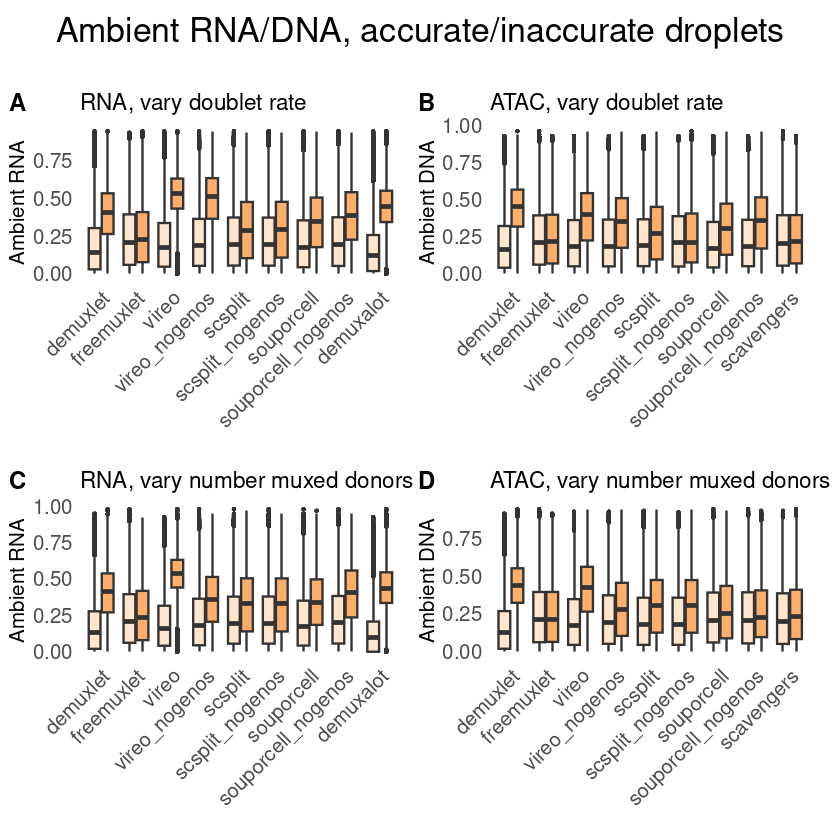

In [16]:
prow <- plot_grid(p1, p2, p3, p4,
  align = 'vh',
  labels = c("A", "B", 'C', 'D'),
  nrow = 2
)
combined_plot <- plot_grid(prow, rel_widths = c(4, .1), width=50)
# combined_plot <- plot_grid(prow, rel_widths = c(4, .1), width=50, heights = c(4, 2))
final_plot <- ggdraw() +
  draw_text("Ambient RNA/DNA, accurate/inaccurate droplets", x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
            size = 20, color = "black", family = "arial") +
  draw_plot(combined_plot, x = 0, y = 0, width = 1, height = 0.9)

# Show the final plot
print(final_plot)